In [129]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

#  Analysis of Transfers During the 2023/2024 Season

In this notebook, we will analyze transfer movements between first division European clubs during the 2023/2024 season.

### Load Dataset

In [130]:
df_transfers = pd.read_csv("transfers.csv")
df_club = pd.read_csv("clubs.csv")
df_comp = pd.read_csv("competitions.csv")
df_transfers.head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,200000.0,Georgios Katris
4,302215,2025-12-31,25/26,279,86,Ferencváros,Werder Bremen,0.0,1000000.0,Naby Keïta
5,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves
6,582058,2025-12-31,25/26,7964,49702,Torpedo Zhodino,Pari NN,0.0,300000.0,Kirill Glushchenkov
7,532536,2025-10-24,24/25,2451,1519,Inverness CT,Dundee United,0.0,150000.0,Jack Newman
8,1038821,2025-07-31,25/26,3837,11204,Fredrikstad,Stade Reims B,0.0,100000.0,Fallou Fall
9,34784,2025-07-01,25/26,467,123,NEC Nijmegen,Retired,NaN,150000.0,Lasse Schöne


### We focus on season 23/24


To kick things off, we need to reorganize the `df_transfers` dataframe.

Our analysis focuses on the **2023-2024 season** and Europe’s Championship. The first step is to filter our dataset accordingly.

In [131]:
df_transfers = df_transfers.loc[df_transfers["transfer_season"]=="23/24",:]
df_transfers = df_transfers.loc[df_transfers["market_value_in_eur"].notna(),:]
df_transfers = df_transfers.loc[df_transfers["transfer_fee"].notna(),:]

In [132]:
df_transfers.head(5)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
658,1086381,2025-06-30,23/24,520,14702,Cercle Brugge,Fluminense U20,0.0,600000.0,Erick Nunes
673,165334,2025-05-31,23/24,2553,988,Kilmarnock FC,Oxford United,0.0,500000.0,Stuart Findlay
793,514304,2024-12-31,23/24,70662,2420,QD West Coast,Vit. Guimarães,0.0,800000.0,Nélson da Luz
804,635807,2024-12-31,23/24,1755,2424,Guarani,Gil Vicente,0.0,350000.0,Marlon
806,646404,2024-12-31,23/24,1465,221,Estoril Praia,Santos,0.0,3000000.0,Zanocelo


For our analysis, we need to know for each team involved in the transfers, in which league and country they belong to.

To do this we will use the dataset "competions.csv" and "club.csv" 

In [133]:
df_club.head(5)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,26.4,16,51.6,7,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.4,19,73.1,18,Olimpico di Roma,70634,€-65.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,27,25.5,18,66.7,17,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [134]:
dic_club = {}
dic_country =  {}
dic_confederation = {}
df_club.set_index("club_id",inplace=True)
dic_club = df_club["domestic_competition_id"].to_dict()

In [135]:
df_transfers["to_comp_id"] = df_transfers["to_club_id"].map(dic_club)
df_transfers["from_comp_id"] = df_transfers["from_club_id"].map(dic_club)

In [136]:
df_transfers = df_transfers.loc[df_transfers["to_comp_id"].notna(),:]
df_transfers = df_transfers.loc[df_transfers["from_comp_id"].notna(),:]

In [137]:
df_comp.set_index("competition_id",inplace=True)

In [138]:
dic_country = df_comp["country_name"].to_dict()
dic_confederation = df_comp["confederation"].to_dict()

In [139]:
df_transfers["to_club_country"] = df_transfers["to_comp_id"].map(dic_country)
df_transfers["from_club_country"] = df_transfers["from_comp_id"].map(dic_country)

df_transfers["to_club_confederation"] = df_transfers["to_comp_id"].map(dic_confederation)
df_transfers["from_club_confederation"] = df_transfers["from_comp_id"].map(dic_confederation)

We keep only European Championship 

In [140]:
df_transfers = df_transfers.loc[df_transfers["to_club_confederation"]=="europa",:]
df_transfers = df_transfers.loc[df_transfers["from_club_confederation"]=="europa",:]


In [141]:
df_transfers.head(5)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,to_comp_id,from_comp_id,to_club_country,from_club_country,to_club_confederation,from_club_confederation
4979,12907,2024-06-30,23/24,6574,2919,Sassuolo,Monza,0.0,1500000.0,Alessio Cragno,IT1,IT1,Italy,Italy,europa,europa
4980,33763,2024-06-30,23/24,2239,252,Cremonese,Genoa,0.0,1000000.0,Massimo Coda,IT1,IT1,Italy,Italy,europa,europa
4981,41384,2024-06-30,23/24,46,1025,Inter,Bologna,0.0,4000000.0,Marko Arnautovic,IT1,IT1,Italy,Italy,europa,europa
4983,44726,2024-06-30,23/24,443,2414,Vejle BK,AC Horsens,0.0,300000.0,Anders Jacobsen,DK1,DK1,Denmark,Denmark,europa,europa
4984,52119,2024-06-30,23/24,383,141,PSV Eindhoven,Galatasaray,0.0,2000000.0,Patrick van Aanholt,TR1,NL1,Turkey,Netherlands,europa,europa


### Visualization

For our first visualization, we will create a heatmap showing the transfer amounts between teams in the European Championship

In [142]:
df_transfers_pivot = df_transfers.groupby(['from_club_country', 'to_club_country'])['transfer_fee'].sum()
df_transfers_pivot_matrix = df_transfers_pivot.unstack(fill_value=0)

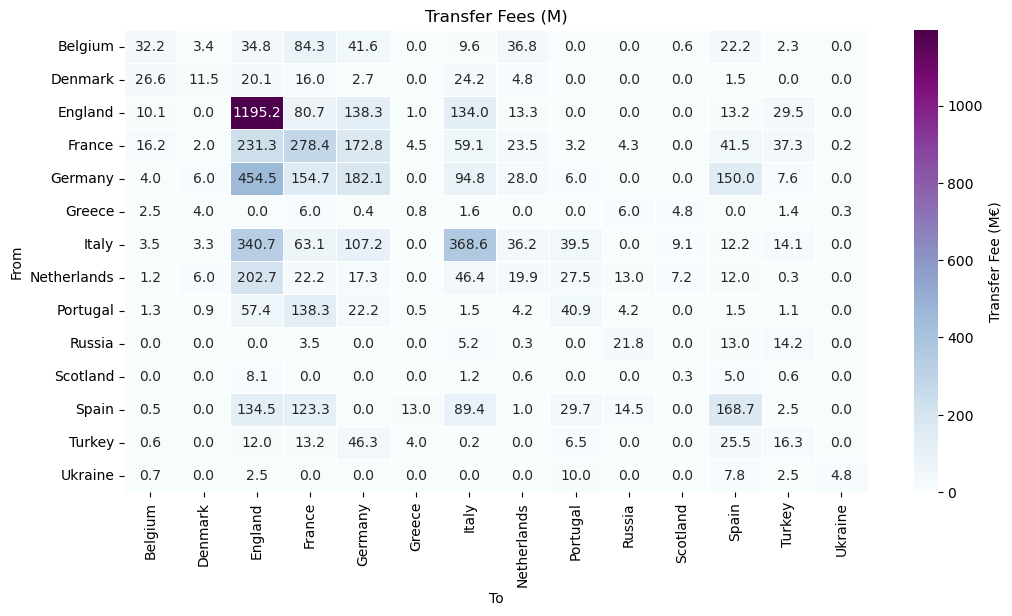

In [143]:
plt.figure(figsize=(12, 6))  
sns.heatmap(
    df_transfers_pivot_matrix/1000000, 
    annot=True,         
    fmt=".1f",
    cmap="BuPu",            
    linewidths=0.5,  
    cbar_kws={'label': 'Transfer Fee (M€)'}  
)

plt.title("Transfer Fees (M)")
plt.xlabel("To")
plt.ylabel("From")
plt.show()


This heatmap allows us to quickly see that the largest volume of transfers occurs between clubs in the English league, with the second largest volume of exchanges happening between England and Germany.\
This is not surprising, given that the English league is the most attractive in the world. The revenue generated by TV rights allows these clubs to spend enormous amounts in the transfer market.

In [ ]:
# In Progresss

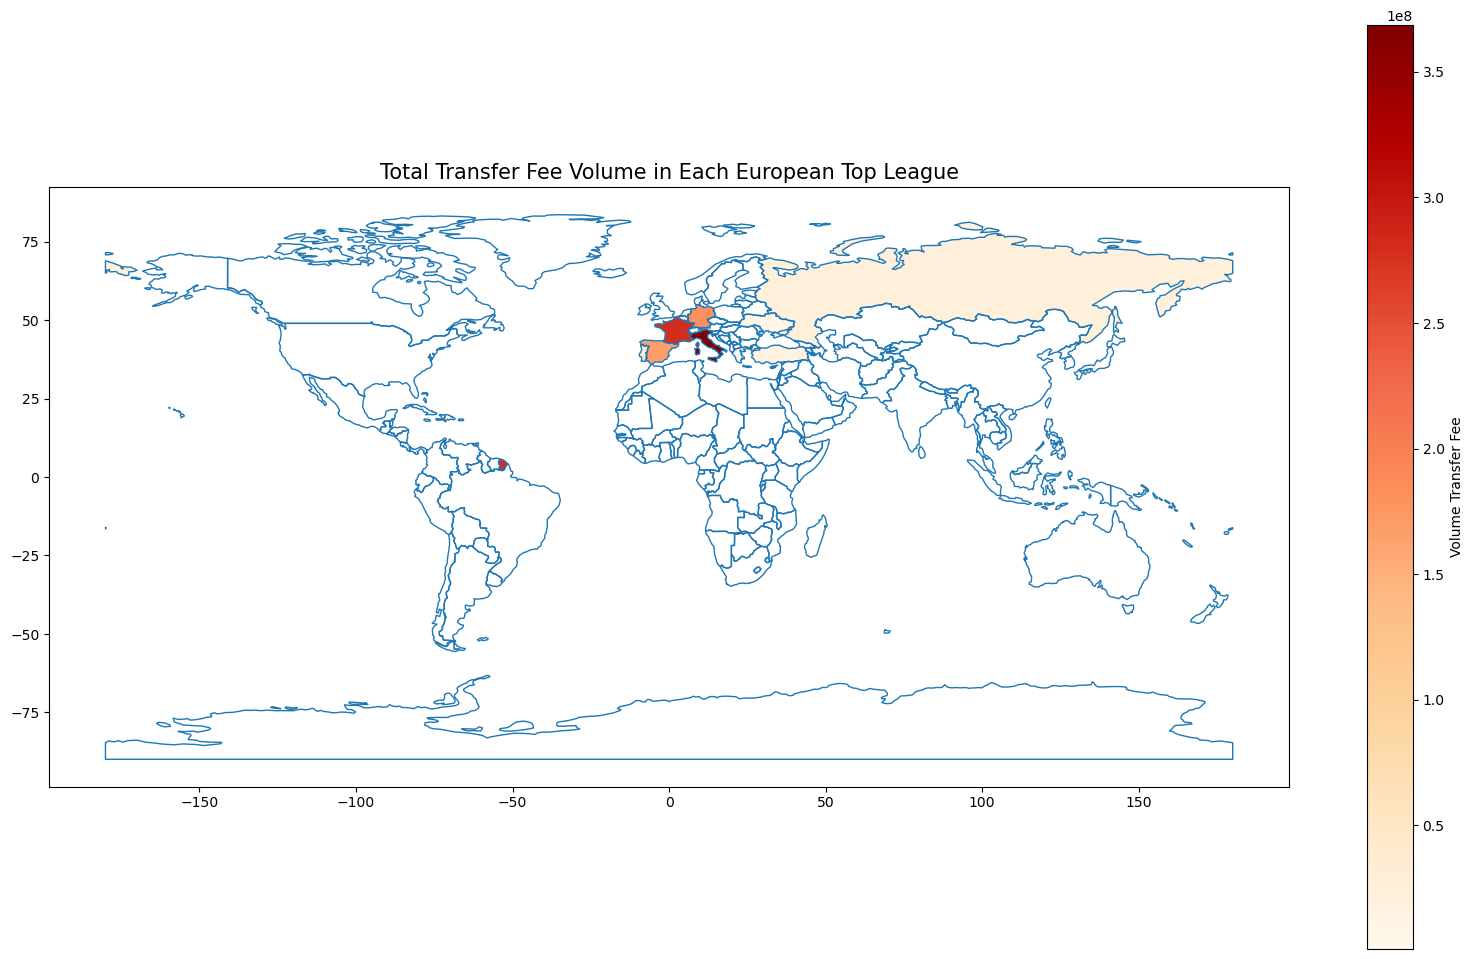

In [158]:
countries = ["Belgium", "Denmark", "England", "France", "Germany", "Greece", "Italy", 
        "Netherlands", "Portugal", "Russia", "Scotland", "Spain", "Turkey", "Ukraine"]
transfer_fee = np.diagonal(df_transfers_pivot_matrix)

df = pd.DataFrame({'Country': countries, 'Transfer Fee': transfer_fee})

shapefile_path = "ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

geo_data = world.merge(df, how='left', left_on='ADMIN', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
geo_data.boundary.plot(ax=ax, linewidth=1)
geo_data.plot(column='Transfer Fee', ax=ax, legend=True,
              legend_kwds={'label': "Volume Transfer Fee"},
              cmap='OrRd')

plt.title('Total Transfer Fee Volume in Each European Top League', fontsize=15)
plt.show()
